In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
# Importing data
in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")
general_data = pd.read_csv("general_data.csv")
employee_survey_data = pd.read_csv("employee_survey_data.csv")
manager_survey_data = pd.read_csv("manager_survey_data.csv")

# Merging survey data with general data
step = pd.merge(general_data, employee_survey_data, on='EmployeeID',how='left')
main = pd.merge(step, manager_survey_data, on='EmployeeID',how='left')

Data Preprocessing for Date Data

In [ ]:
# Removing complete empty columns from date data
in_time.dropna(axis=1, how='all',inplace=True)
out_time.dropna(axis=1, how='all',inplace=True)

# Replacing null values with zero
in_time.fillna(0, inplace=True)
out_time.fillna(0, inplace=True)

In [ ]:
in_time.head(3)

,Unnamed: 0,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,...,0,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,2015-01-15 09:37:57,...,2015-12-17 09:15:08,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,2015-01-15 09:55:11,...,2015-12-17 09:53:17,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39


In [ ]:
# Changing index
in_time.set_index('Unnamed: 0',inplace=True)
out_time.set_index('Unnamed: 0',inplace=True)

In [ ]:
# Converting to datetime
in_time.iloc[:, :] = in_time.iloc[:, :].apply(pd.to_datetime, errors='coerce')
out_time.iloc[:, :] = out_time.iloc[:, :].apply(pd.to_datetime, errors='coerce')

In [ ]:
# Finding daily worked time
time_spent = (out_time - in_time)
time_spent.head(3)

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days 08:06:33,0 days 07:27:17,NaT,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,NaT,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11


In [ ]:
# Finding total worked time
total_time_spent = pd.DataFrame(time_spent.sum(axis=1))
total_time_spent.head(3)

,0
Unnamed: 0,
1,71 days 06:41:13
2,75 days 21:40:36
3,70 days 17:12:15


In [ ]:
# Finding the number of days worked
in_time['worked_days_count'] = in_time.notnull().sum(axis=1)
# Finding the total seconds worked
total_time_spent['total_seconds']= (total_time_spent).iloc[:,0].dt.total_seconds()
# Finding the average seconds worked
total_time_spent['average_seconds'] = total_time_spent['total_seconds']/in_time['worked_days_count']

In [ ]:
# Finding the number of non-working days
time_spent['Non_Working_Days'] = time_spent.isna().sum(axis=1)
# Merging non-working days to the total time spent table
total_time_spent= pd.merge(time_spent['Non_Working_Days'], total_time_spent, left_index=True, right_index=True,how='left')
# Dropping total work time column
total_time_spent.drop(columns=total_time_spent.columns[1], axis=1, inplace=True)
total_time_spent.head(3)

,Non_Working_Days,total_seconds,average_seconds
Unnamed: 0,,,
1,0,6158473.0,24732.823293
2,12,6558036.0,27671.037975
3,7,6109935.0,25247.665289


In [ ]:
# Merging total time spent table with main table
merged_data= pd.merge(main, total_time_spent, left_on='EmployeeID', right_index=True,how='left')
merged_data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Non_Working_Days,total_seconds,average_seconds
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,0,0,3.0,4.0,2.0,3,3,0,6158473.0,24732.823293
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,1,4,3.0,2.0,4.0,2,4,12,6558036.0,27671.037975
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,0,3,2.0,2.0,1.0,3,3,7,6109935.0,25247.665289


Dropping Unnecessary Columns

In [ ]:
merged_data = merged_data.drop(columns=['EmployeeID','EmployeeCount','Over18','StandardHours'])

Copying Data for Processing

In [ ]:
data=merged_data.copy()
data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Non_Working_Days,total_seconds,average_seconds
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,0,0,3.0,4.0,2.0,3,3,0,6158473.0,24732.823293
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,1,4,3.0,2.0,4.0,2,4,12,6558036.0,27671.037975
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,0,3,2.0,2.0,1.0,3,3,7,6109935.0,25247.665289


Encoding Ordinal and Categorical Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Transforming the target variable with label encoding
data['Attrition'] = LabelEncoder().fit_transform(data['Attrition'])

# Transforming 'BusinessTravel' to ordinal values
business_travel_mapping = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}
data['BusinessTravel'] = data['BusinessTravel'].map(business_travel_mapping)

# Applying One-Hot Encoding to categorical features
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
# Create OneHotEncoder instance
encoder = OneHotEncoder(sparse=False)
# Encode categorical data
encoded_features = encoder.fit_transform(data[categorical_columns])
# Get new column names
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
# Convert encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
# Add encoded columns to the original DataFrame
data = pd.concat([data.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [ ]:
data.head(3)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0,1,6,2,1,131160,1.0,11,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,31,1,2,10,1,1,41890,0.0,23,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,32,0,2,17,4,4,193280,1.0,15,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

features = data.drop('Attrition', axis=1)
target = data['Attrition']

# Splitting the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

 #### Handling Null Values

Checking Features Containing Null Values

In [ ]:
# Seeing features containing null values
null_counts = data.isna().sum()
print(f'Features containing null values: \n{null_counts[null_counts > 0]}\n')

# Seeing count of null values for the sets
print(f'X_train: {X_train.isna().sum().sum()}')
#print(f'X_val: {X_val.isna().sum().sum()}')
print(f'X_test: {X_test.isna().sum().sum()}')

Features containing null values: 
NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

X_train: 90
X_test: 21


Checking Graphs of Numerical Columns

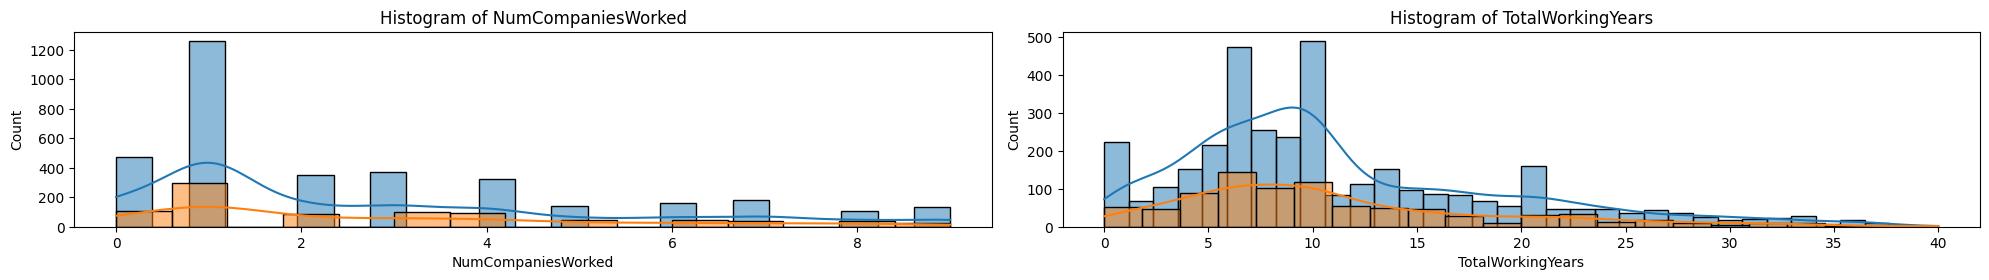

In [ ]:
# Columns to visualize
columns_to_visualize = ['NumCompaniesWorked', 'TotalWorkingYears']

# Plotting histograms and boxplots
plt.figure(figsize=(20, 5))

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_train[column], kde=True)
    plt.title(f'Histogram of {column}')

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(X_test[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Filling Null Values

In [ ]:
from sklearn.impute import SimpleImputer

# Columns for different imputation strategies
median_columns = ['NumCompaniesWorked', 'TotalWorkingYears']
mode_columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

# Creating imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

# Fitting imputers on the training data only
median_imputer.fit(X_train[median_columns])
mode_imputer.fit(X_train[mode_columns])

# Transforming training and test data using the fitted imputers
X_train[median_columns] = median_imputer.transform(X_train[median_columns])
X_test[median_columns] = median_imputer.transform(X_test[median_columns])
X_train[mode_columns] = mode_imputer.transform(X_train[mode_columns])
X_test[mode_columns] = mode_imputer.transform(X_test[mode_columns])

Checking Datasets

In [ ]:
# Checking count of null values for the sets
print(f'X_train: {X_train.isna().sum().sum()}')
# print(f'X_val: {X_val.isna().sum().sum()}')
print(f'X_test: {X_test.isna().sum().sum()}')

X_train: 0
X_test: 0


#### Handling Outliers for Train Set

Checking Graphs of Features with Outliers

In [ ]:
# numeric_columns = ['Age','DistanceFromHome','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
#                    'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion',
#                    'YearsWithCurrManager','Non_Working_Days','total_seconds','average_seconds']

# # Identifying columns with outliers
# outlier_columns = []
# for column in numeric_columns:
#     z_scores = np.abs(stats.zscore(X_train[column]))
#     if np.any(z_scores > 3):
#         outlier_columns.append(column)

# # Visualizing boxplots for columns with outliers
# num_plots = len(outlier_columns)
# plt.figure(figsize=(20, 4 * num_plots))
# for i, column in enumerate(outlier_columns, 1):
#     plt.subplot(num_plots, 1, i)
#     sns.boxplot(y=X_train[column])
#     plt.title(f'{column}')
# plt.tight_layout()
# plt.show()

Removing Outliers

In [ ]:
# # Calculate the z-scores for each column and filter out rows with z-scores greater than 3
# X_train_cleaned, y_train_cleaned = X_train.copy(), y_train.copy()
# for column in outlier_columns:
#     z_scores = np.abs(stats.zscore(X_train_cleaned[column]))
#     X_train_cleaned = X_train_cleaned[z_scores <= 3]

# outlier_indices = set(X_train.index) - set(X_train_cleaned.index)
# y_train_cleaned = y_train_cleaned.drop(outlier_indices)

# # Visualizing boxplots for cleaned columns
# # num_plots = len(outlier_columns)
# # plt.figure(figsize=(20, 4 * num_plots))
# # for i, column in enumerate(outlier_columns, 1):
# #     plt.subplot(num_plots, 1, i)
# #     sns.boxplot(y=X_train_cleaned[column])
# #     plt.title(f'{column} (Cleaned)')
# # plt.tight_layout()
# # plt.show()

# print(f"X_train: {X_train.shape}")
# print(f"y_train: {y_train.shape}")
# print(f"X_train_cleaned: {X_train_cleaned.shape}")
# print(f"y_train_cleaned: {y_train_cleaned.shape}")

#### Correlation Matrix

Correlation Matrix for Train Data

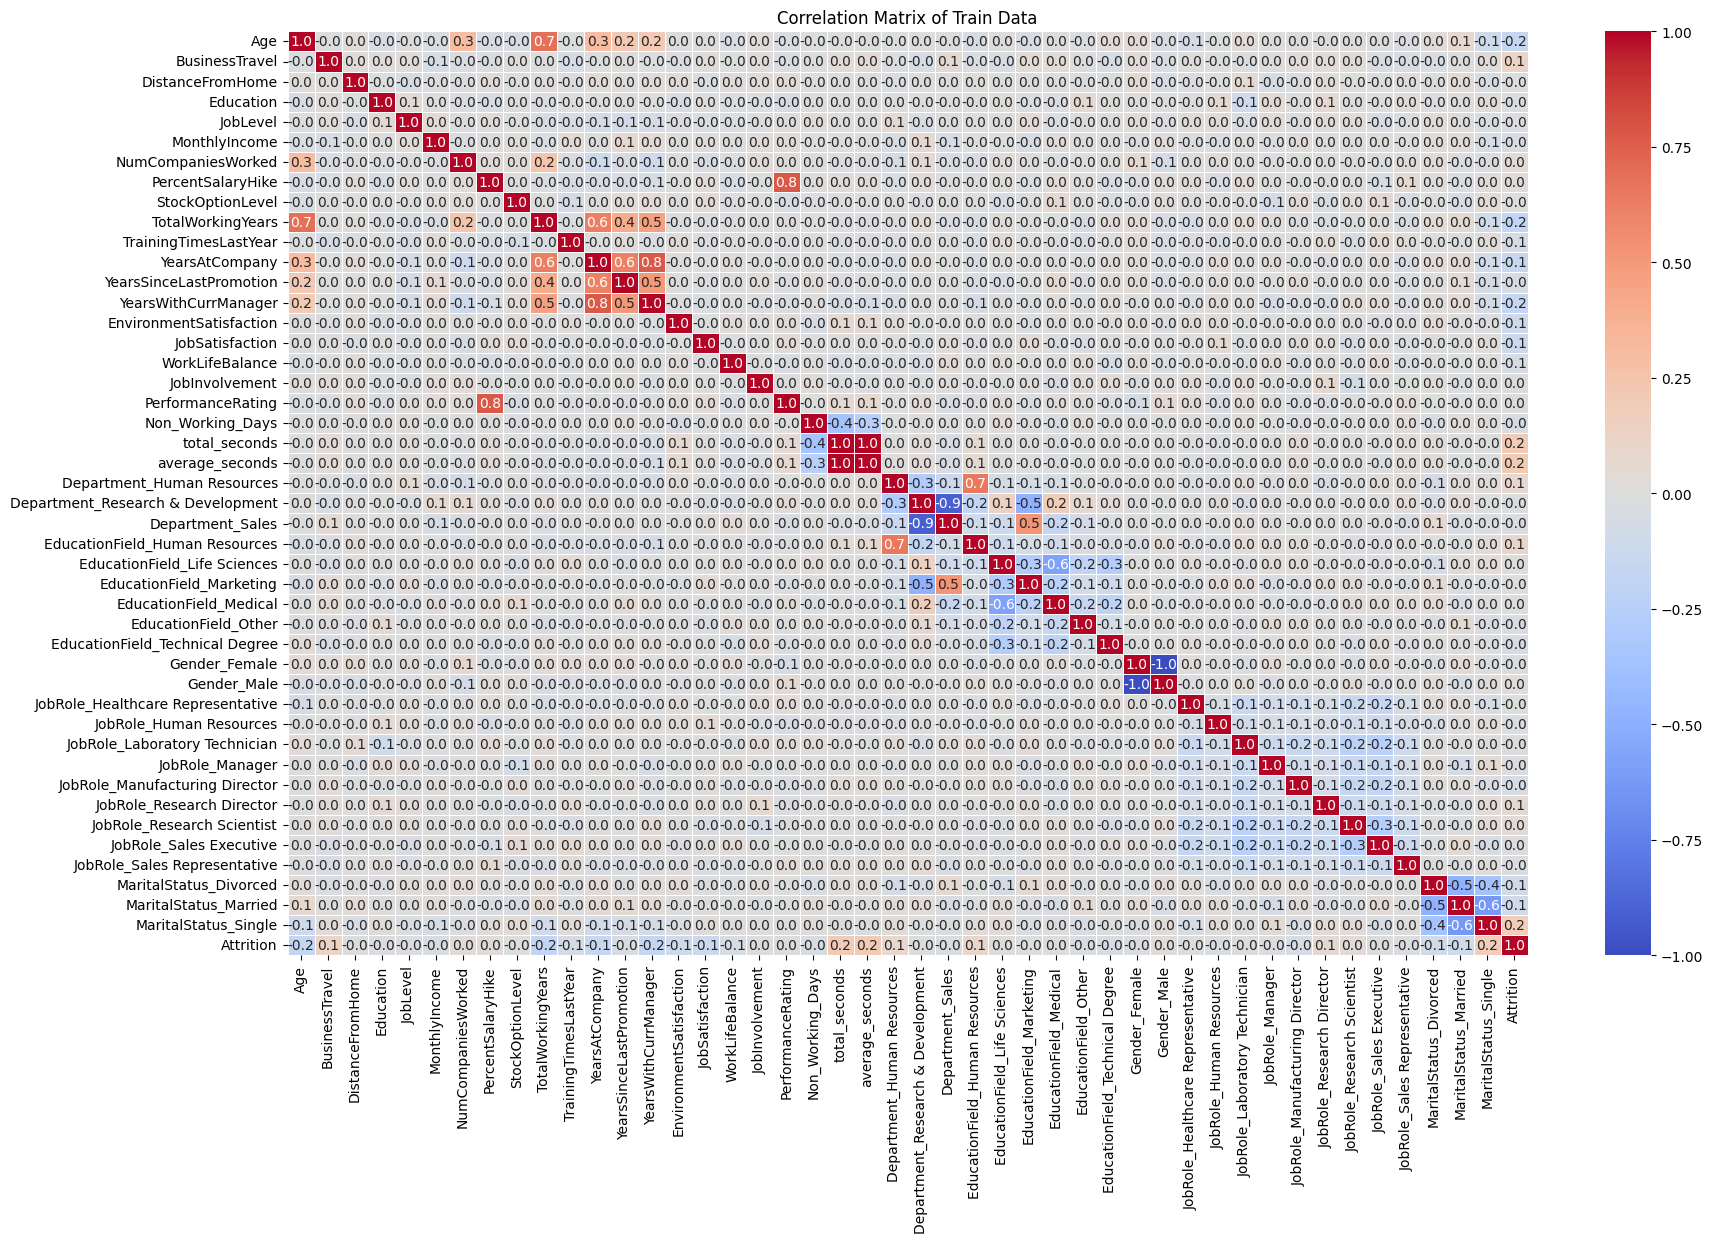

In [ ]:
# Merging X_train and y_train datasets
train_data = pd.concat([X_train, y_train], axis=1)

# Calculating correlation matrix
correlation_matrix = train_data.corr().round(3)

# Visualizing the correlation matrix
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.1f')
plt.title('Correlation Matrix of Train Data')
plt.show()

Selecting Top Correlated Features

In [ ]:
# Examining correlations with the target variable
correlations_with_target = correlation_matrix['Attrition'].abs().sort_values(ascending=False)

# Selecting top 15 features with highest correlation with the target variable
num_features_to_select = 15
top_features = correlations_with_target.head(num_features_to_select)

print(f"Top {num_features_to_select} features with highest correlation with Attrition:\n")
print(top_features)

Top 15 features with highest correlation with Attrition:

Attrition                         1.000
average_seconds                   0.199
total_seconds                     0.197
MaritalStatus_Single              0.184
TotalWorkingYears                 0.182
YearsWithCurrManager              0.168
Age                               0.166
YearsAtCompany                    0.149
JobSatisfaction                   0.126
BusinessTravel                    0.120
EnvironmentSatisfaction           0.106
MaritalStatus_Married             0.098
EducationField_Human Resources    0.090
MaritalStatus_Divorced            0.090
Department_Human Resources        0.081
Name: Attrition, dtype: float64


Correlation Matrix for Selected Features

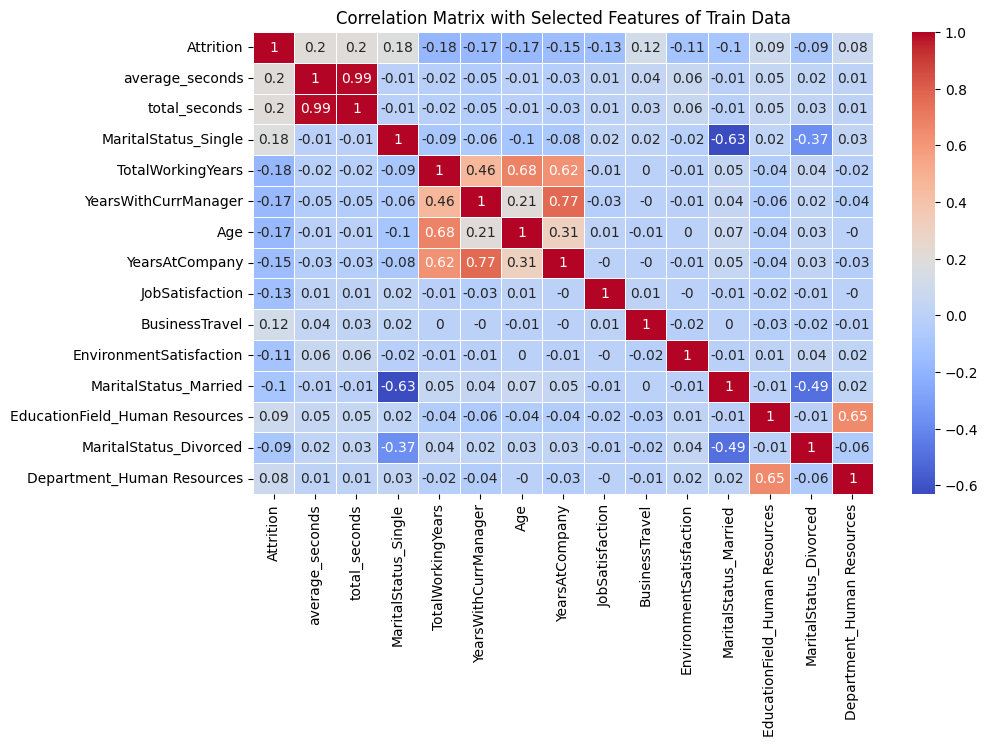

In [ ]:
# Dropping columns other than the top selected features and creating a new correlation matrix
selected_features = top_features.index
train_data_selected = train_data[selected_features]

# Calculating a new correlation matrix
correlation_matrix_selected = train_data_selected.corr().round(2)

# Visualizing the updated correlation matrix with selected features
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix with Selected Features of Train Data')
plt.show()

#### XGBoost Model

Hyperparameter Optimization and Training the Model

In [ ]:
#pip install xgboost
#pip install optuna
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Defining the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'n_jobs': -1,  # Use all available CPU cores
        'random_state': 42
    }

    # Initialize and train the model
    model = XGBClassifier(**params)

    # Cross-validation
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Return the average accuracy
    return scores.mean()

# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best parameters from Bayesian Optimization
best_params = study.best_trial.params
print(f"Best parameters: {best_params}")

# Training the Model with best hyperparameters
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)

[I 2024-07-01 14:58:21,046] A new study created in memory with name: no-name-ddf3fa8e-2ee0-4c4c-98a7-edd7b1df5b4d
[I 2024-07-01 14:58:25,890] Trial 0 finished with value: 0.9767573696145124 and parameters: {'n_estimators': 248, 'max_depth': 5, 'learning_rate': 0.22006090346646892, 'subsample': 0.7270568314633239, 'colsample_bytree': 0.8034812926752584, 'reg_alpha': 0.258168158909749, 'reg_lambda': 0.546739035970716}. Best is trial 0 with value: 0.9767573696145124.
[I 2024-07-01 14:58:27,013] Trial 1 finished with value: 0.9784580498866213 and parameters: {'n_estimators': 157, 'max_depth': 9, 'learning_rate': 0.26132137011444073, 'subsample': 0.952112201972465, 'colsample_bytree': 0.7479116280493328, 'reg_alpha': 0.5566800894470864, 'reg_lambda': 0.9399837388170077}. Best is trial 1 with value: 0.9784580498866213.
[I 2024-07-01 14:58:28,200] Trial 2 finished with value: 0.9719387755102041 and parameters: {'n_estimators': 223, 'max_depth': 5, 'learning_rate': 0.20207844960135965, 'subsam

Best parameters: {'n_estimators': 195, 'max_depth': 8, 'learning_rate': 0.27421616240878965, 'subsample': 0.9498904612221567, 'colsample_bytree': 0.7583379048163983, 'reg_alpha': 0.4723933846389443, 'reg_lambda': 0.7912478484734083}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7583379048163983, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.27421616240878965,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=195, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Evaluating the Model on the Test Data

In [ ]:
y_pred = model.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Confusion Matrix:")
print(cm_df.to_string())

# Calculating accuracy, recall and precision
test_accuracy = accuracy_score(y_test, y_pred).round(3)
test_precision = precision_score(y_test, y_pred).round(3)
test_recall = recall_score(y_test, y_pred).round(3)
test_f1 = metrics.f1_score(y_test, y_pred).round(3)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 score: {test_f1}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          741            0
Actual 1            3          138
Accuracy: 0.997
Precision: 1.0
Recall: 0.979
F1 score: 0.989


Learning Curve

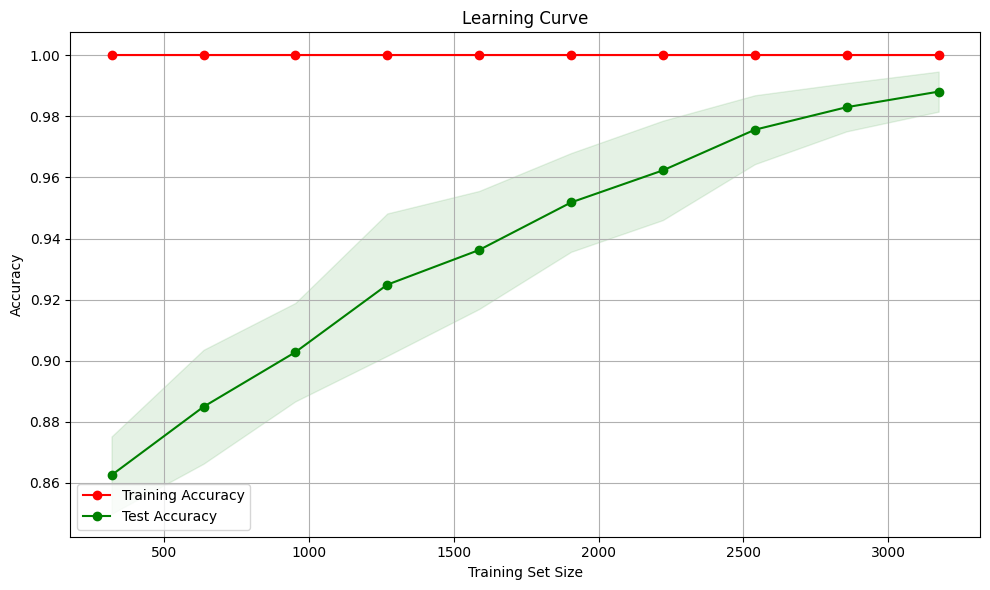

In [ ]:
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='accuracy', n_jobs=-1)

# Creating means and standard deviations of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Arranging figsize
plt.figure(figsize=(10, 6))
# Drawing lines
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Accuracy')
# Drawing bonds
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='g', alpha=0.1)
# Creating plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

Log Loss and Classification Error

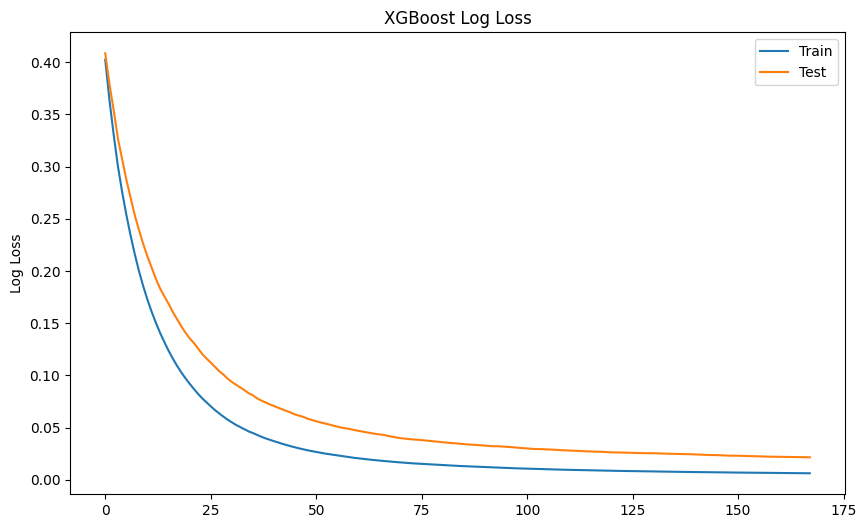

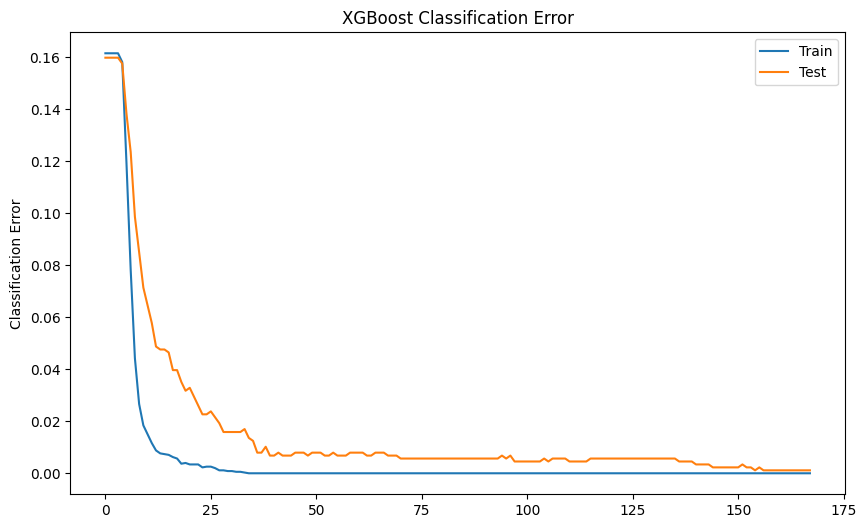

In [ ]:
# Training the Model
model = XGBClassifier(**best_params)
eval_set=[(X_train,y_train),(X_test,y_test)]
model.fit(X_train, y_train, eval_metric=["error","logloss"], eval_set=eval_set, verbose=False, early_stopping_rounds=10)

# Retrieving performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plotting log loss
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plotting classification error
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

Accuracy: 0.9954648526077098, Precision: 0.9790209790209791, Recall: 0.9929078014184397


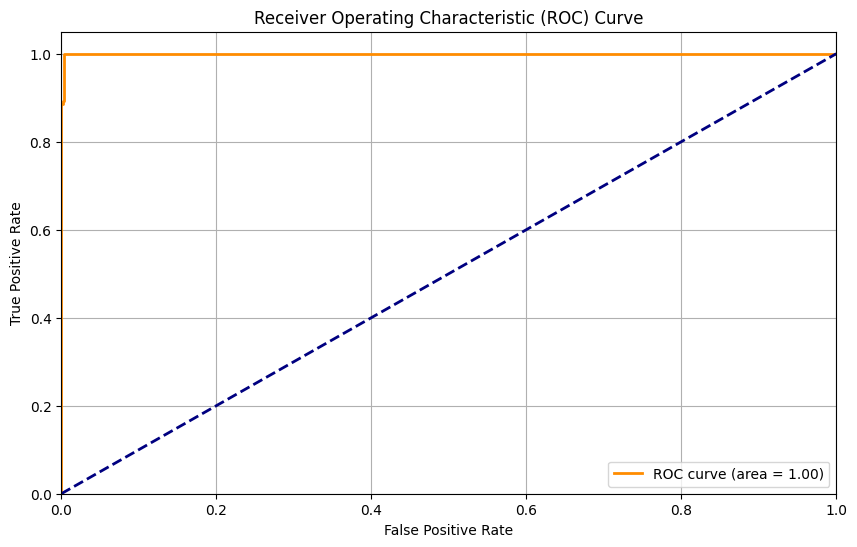

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Training the Model with adjusted parameters
model = XGBClassifier(**best_params)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False, early_stopping_rounds=10)

# Making predictions for test data
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# Evaluating predictions
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### Seeing What Happens When Reducing Features with Low Correlation

Determining Features to Stay

In [ ]:
# Merging X_train and y_train datasets
train_data = pd.concat([X_train, y_train], axis=1)

# Calculating correlation matrix
correlation_matrix = train_data.corr().round(3)

# Examining correlations with Attrition
correlations_with_target = correlation_matrix['Attrition'].abs().sort_values(ascending=False)

# Selecting top 15 features with highest correlation with Attrition
num_features_to_select = 15
top_features = correlations_with_target.head(num_features_to_select + 1).drop('Attrition')

print(f"Top {num_features_to_select} features with highest correlation with Attrition:\n")
print(top_features)

Top 15 features with highest correlation with Attrition:

average_seconds                   0.199
total_seconds                     0.197
MaritalStatus_Single              0.184
TotalWorkingYears                 0.182
YearsWithCurrManager              0.168
Age                               0.166
YearsAtCompany                    0.149
JobSatisfaction                   0.126
BusinessTravel                    0.120
EnvironmentSatisfaction           0.106
MaritalStatus_Married             0.098
EducationField_Human Resources    0.090
MaritalStatus_Divorced            0.090
Department_Human Resources        0.081
JobRole_Research Director         0.061
Name: Attrition, dtype: float64


Removing Features with Low Correlation

In [ ]:
# Getting the names of the top features
selected_features = top_features.index.tolist()

# Reducing the dataset to only top features
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# Verify the reduced datasets
print("X_train_reduced:", X_train_reduced.shape)
print("X_test_reduced:", X_test_reduced.shape)

X_train_reduced: (3528, 15)
X_test_reduced: (882, 15)


Training XGBoost Model

In [ ]:
#pip install xgboost
#pip install optuna
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Defining the objective function for Optuna
def objective(trial):
    # Define the hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'n_jobs': -1,  # Use all available CPU cores
        'random_state': 42
    }

    # Initialize and train the model
    model = XGBClassifier(**params)

    # Cross-validation
    cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    # Return the average accuracy
    return scores.mean()

# Create the study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Best parameters from Bayesian Optimization
best_params = study.best_trial.params
print(f"Best parameters: {best_params}")

# Training the Model with best hyperparameters
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)

[I 2024-07-01 13:48:00,953] A new study created in memory with name: no-name-25cc71e4-1abd-4e7e-83ff-347591d98db2
[I 2024-07-01 13:48:02,922] Trial 0 finished with value: 0.971938775510204 and parameters: {'n_estimators': 194, 'max_depth': 9, 'learning_rate': 0.1156783187152574, 'subsample': 0.5749594971603245, 'colsample_bytree': 0.8320035853988594, 'reg_alpha': 0.7241169784093199, 'reg_lambda': 0.4548277531755758}. Best is trial 0 with value: 0.971938775510204.
[I 2024-07-01 13:48:04,671] Trial 1 finished with value: 0.9685374149659864 and parameters: {'n_estimators': 203, 'max_depth': 9, 'learning_rate': 0.0918340387708801, 'subsample': 0.5165443902030384, 'colsample_bytree': 0.782315702907703, 'reg_alpha': 0.8016669031173034, 'reg_lambda': 0.8176142376417666}. Best is trial 0 with value: 0.971938775510204.
[I 2024-07-01 13:48:05,269] Trial 2 finished with value: 0.929421768707483 and parameters: {'n_estimators': 131, 'max_depth': 3, 'learning_rate': 0.16964159851849503, 'subsample'

Best parameters: {'n_estimators': 237, 'max_depth': 7, 'learning_rate': 0.29522462935634175, 'subsample': 0.6861870229187029, 'colsample_bytree': 0.6008551876853008, 'reg_alpha': 0.7399439521110107, 'reg_lambda': 0.3327445126599248}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6008551876853008, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.29522462935634175,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=237, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

# Generating confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("Confusion Matrix:")
print(cm_df.to_string())

# Calculating accuracy, recall and precision
test_accuracy = accuracy_score(y_test, y_pred).round(3)
test_precision = precision_score(y_test, y_pred).round(3)
test_recall = recall_score(y_test, y_pred).round(3)
test_f1 = metrics.f1_score(y_test, y_pred).round(3)
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 score: {test_f1}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          740            1
Actual 1            4          137
Accuracy: 0.994
Precision: 0.993
Recall: 0.972
F1 score: 0.982


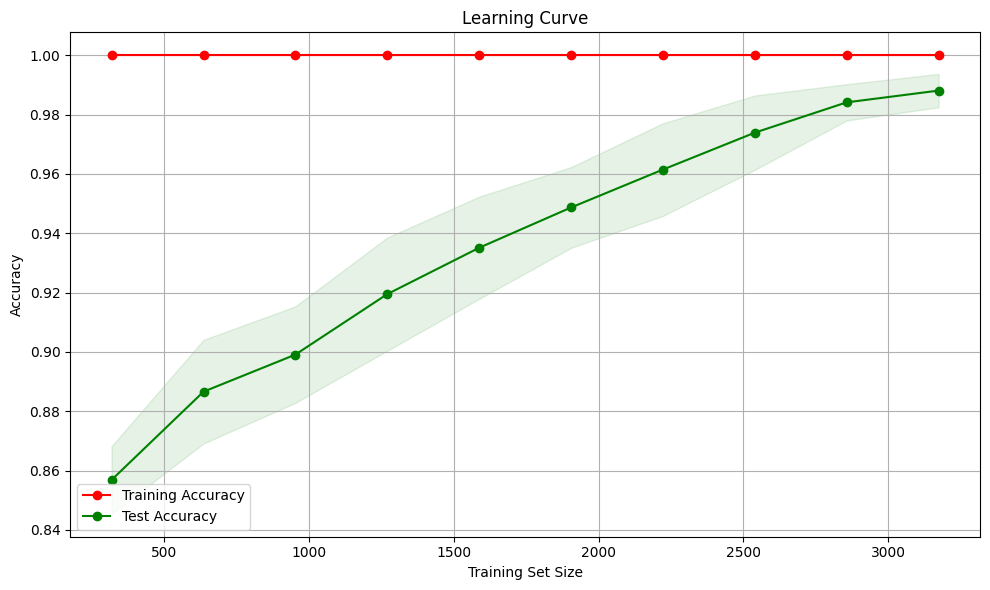

In [ ]:
# Creating CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='accuracy', n_jobs=-1)

# Creating means and standard deviations of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Arranging figsize
plt.figure(figsize=(10, 6))
# Drawing lines
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Test Accuracy')
# Drawing bonds
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='g', alpha=0.1)
# Creating plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc='best')
plt.tight_layout()
plt.grid()
plt.show()

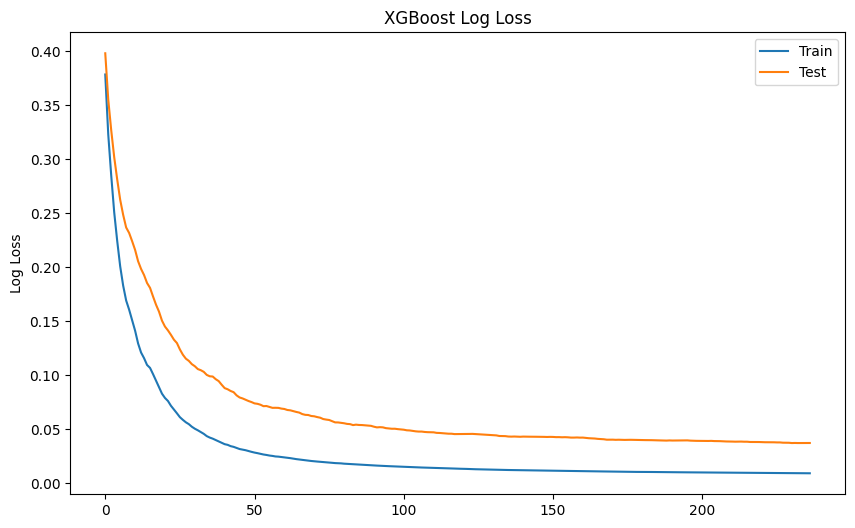

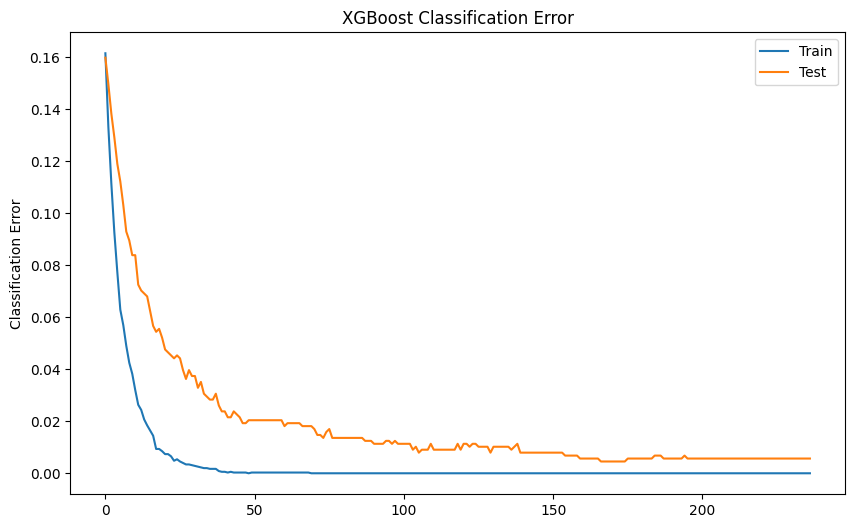

In [ ]:
import matplotlib.pyplot as plt

# Training the Model
model = XGBClassifier(**best_params)
eval_set=[(X_train,y_train),(X_test,y_test)]
model.fit(X_train, y_train, eval_metric=["error","logloss"], eval_set=eval_set, verbose=False)

# Retrieving performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# Plotting log loss
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plotting classification error
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()